In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, to_tree

In [2]:
regions_datadir = "/data/uscuni-ulce/"
linkage_dir = '/data/uscuni-ulce/processed_data/morphotope_linkage/'

model_params = '_75_0_None_None_False'

In [3]:
linkage_matrix = np.load('/data/uscuni-ulce/processed_data/clusters/kmeans_linkage.npy')

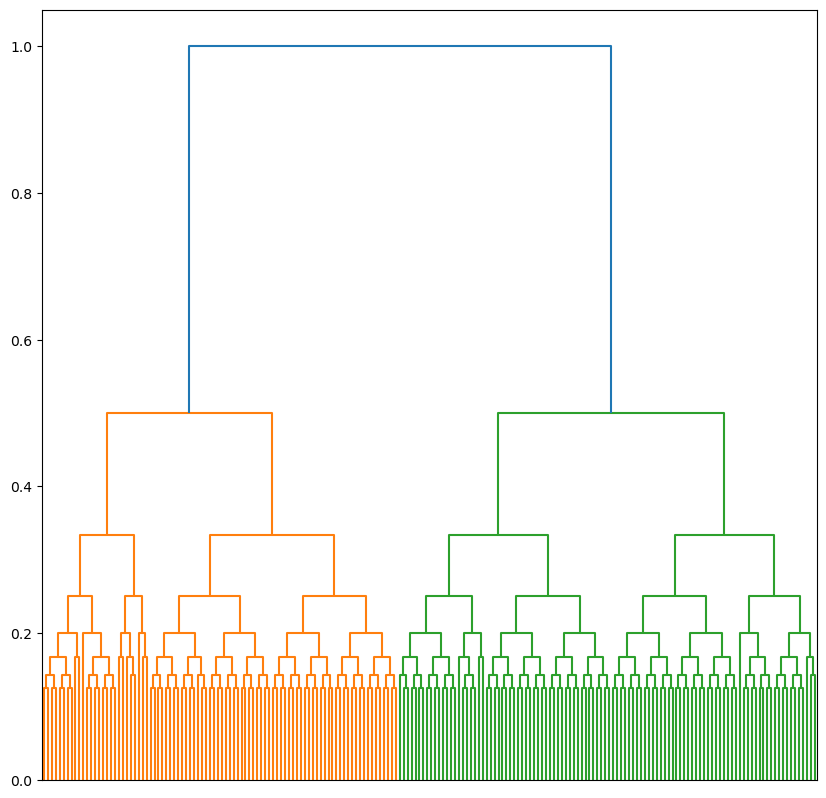

In [59]:
fig,ax = plt.subplots(figsize=(10,10))
d = dendrogram(linkage_matrix ,ax=ax, no_labels=True, truncate_mode="level", p=7)

In [18]:
tree = to_tree(linkage_matrix)

In [39]:
tree

In [40]:
tree.get_left().id

113039

In [75]:
def linkage_to_newick(Z, labels, cutoff=0):
    """
    """
    tree = to_tree(Z, False) #scipy.sp_hierarchy.to_tree
    def build_newick(node, newick, parentdist, leaf_names):
        if node.is_leaf() or node.dist < cutoff: # This is for SciPy not for ete or skbio so `is_leaf` utility function does not apply
            print(node.id)
            return f"{node.id}:{(parentdist - node.dist)/2}{newick}"
        else:
            if len(newick) > 0:
                newick = f"){node.id}:{(parentdist - node.dist)/2}{newick}"
            else:
                newick = ");"
            newick = build_newick(node.get_left(), newick, node.dist, leaf_names)
            newick = build_newick(node.get_right(), f",{newick}", node.dist, leaf_names)
            newick = f"({newick}"
            return newick
    return build_newick(tree, "", tree.dist, labels)

In [77]:
newick = linkage_to_newick(linkage_matrix, d['leaves'], cutoff=1/7)

71103
73469
74381
76531
15926
47679
62099
76716
77488
77498
77505
3022
56359
33905
48005
59033
62200
17995
39891
78226
78414
78746
79700
81666
82759
48982
82762
83808
84423
84748
86690
88803
91963
92140
92979
93016
93032
94161
94643
95351
98074
100323
101176
102184
103432
104276
107356
107498
107770
110968
113033
44687
113056
113105
113205
113390
114156
114221
114535
5437
114543
114546
8093
20440
114634
114725
114956
115154
115233
115246
115267
115330
115845
116276
116467
116829
117417
117648
117651
117652
118425
119370
120155
120843
121284
121890
122655
123313
124390
125813
126735
128009
128183
129977
130399
130456
41550
130491
131054
132096
132098
132226
132263
132490
132977
42136
23651
45360


In [58]:
newick

'(((132983:0.04166666666666666,130460:0.04166666666666666)132984:0.08333333333333334,(117656:0.04166666666666666,114551:0.04166666666666666)117657:0.08333333333333334)132985:0.25,((113037:0.04166666666666666,92983:0.04166666666666666)113038:0.08333333333333334,(77516:0.04166666666666666,77509:0.04166666666666666)77517:0.08333333333333334)113039:0.25);'

In [61]:
links = pd.read_parquet('/data/uscuni-ulce/processed_data/clusters/cluster_mapping_v3.pq')

In [67]:
links.astype(str).to_json()

'{"1":{"1":"1","2":"1","3":"1","4":"1","5":"1","6":"1","7":"1","8":"1","9":"1","10":"1","11":"1","12":"1","13":"1","14":"1","15":"1","16":"1","17":"1","18":"1","19":"1","20":"1","21":"1","22":"1","23":"1","24":"1","25":"1","26":"1","27":"1","28":"1","29":"1","30":"1","31":"1","32":"1","33":"1","34":"1","35":"1","36":"1","37":"1","38":"1","39":"1","40":"1","41":"1","42":"1","43":"1","44":"1","45":"1","46":"1","47":"1","48":"1","49":"1","50":"1","51":"1","52":"2","53":"2","54":"2","55":"2","56":"2","57":"2","58":"2","59":"2","60":"2","61":"2","62":"2","63":"2","64":"2","65":"2","66":"2","67":"2","68":"2","69":"2","70":"2","71":"2","72":"2","73":"2","74":"2","75":"2","76":"2","77":"2","78":"2","79":"2","80":"2","81":"2","82":"2","83":"2","84":"2","85":"2","86":"2","87":"2","88":"2","89":"2","90":"2","91":"2","92":"2","93":"2","94":"2","95":"2","96":"2","97":"2","98":"2","99":"2","100":"2","101":"2","102":"2","103":"2","104":"2","105":"2","106":"2","107":"2","108":"2"},"2":{"1":"1","2":"1"

In [68]:
links

,1,2,3,4,5,6
7,,,,,,
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,2
4,1,1,1,1,1,2
5,1,1,1,1,2,3
...,...,...,...,...,...,...
104,2,4,8,16,31,59
105,2,4,8,16,31,59
106,2,4,8,16,32,60


In [69]:
mapping = {
        "1": "1",
        "2": "1",
        "3": "1",
        "4": "1",
        "5": "1",
        "6": "1",
        "7": "2",
        "8": "2",
        "9": "2",
        "10": "2",
        "11": "2",
        "12": "3",
        "13": "3",
        "14": "3",
        "15": "3",
        "16": "3",
        "17": "4",
        "18": "4",
        "19": "4",
        "20": "5",
        "21": "5",
        "22": "5",
        "23": "5",
        "24": "5",
        "25": "5",
        "26": "5",
        "27": "5",
        "28": "6",
        "29": "6",
        "30": "6",
        "31": "6",
        "32": "6",
        "33": "6",
        "34": "6",
        "35": "6",
        "36": "7",
        "37": "7",
        "38": "7",
        "39": "7",
        "40": "7",
        "41": "7",
        "42": "7",
        "43": "7",
        "44": "8",
        "45": "8",
        "46": "8",
        "47": "8",
        "48": "8",
        "49": "8",
        "50": "8",
        "51": "8",
        "52": "9",
        "53": "9",
        "54": "9",
        "55": "9",
        "56": "9",
        "57": "9",
        "58": "9",
        "59": "9",
        "60": "10",
        "61": "10",
        "62": "10",
        "63": "10",
        "64": "10",
        "65": "11",
        "66": "11",
        "67": "11",
        "68": "11",
        "69": "11",
        "70": "11",
        "71": "11",
        "72": "11",
        "73": "12",
        "74": "12",
        "75": "12",
        "76": "12",
        "77": "12",
        "78": "12",
        "79": "12",
        "80": "12",
        "81": "13",
        "82": "13",
        "83": "13",
        "84": "13",
        "85": "13",
        "86": "13",
        "87": "13",
        "88": "13",
        "89": "14",
        "90": "14",
        "91": "14",
        "92": "14",
        "93": "14",
        "94": "14",
        "95": "14",
        "96": "14",
        "97": "15",
        "98": "15",
        "99": "15",
        "100": "15",
        "101": "15",
        "102": "16",
        "103": "16",
        "104": "16",
        "105": "16",
        "106": "16",
        "107": "16",
        "108": "16"
      }

In [73]:
colors = {"1": "#1cae75",
        "2": "#922800",
        "3": "#6da2ff",
        "4": "#38a6a5",
        "5": "#94346e",
        "6": "#73af48",
        "7": "#1d6996",
        "8": "#0f8554",
        "9": "#354dbe",
        "10": "#edad08",
        "11": "#dba2ff",
        "12": "#a65904",
        "13": "#3d6100",
        "14": "#aeb6ef",
        "15": "#f79e8e",
        "16": "#6f4070",
        "17": "#cc503e",
        "18": "#965145",
        "19": "#1096c6",
        "20": "#ae59db",
        "21": "#6969e3",
        "22": "#1ccefb",
        "23": "#968ac6",
        "24": "#ef9eca",
        "25": "#0cdba2",
        "26": "#e761b2",
        "27": "#6d4d00",
        "28": "#5f4690",
        "29": "#a66996",
        "30": "#498a04",
        "31": "#967d00",
        "32": "#babe71",
        "33": "#006d69",
        "34": "#e17c05",
        "35": "#1cae75",
        "36": "#922800",
        "37": "#6da2ff",
        "38": "#38a6a5",
        "39": "#94346e",
        "40": "#73af48",
        "41": "#1d6996",
        "42": "#0f8554",
        "43": "#354dbe",
        "44": "#edad08",
        "45": "#dba2ff",
        "46": "#a65904",
        "47": "#3d6100",
        "48": "#aeb6ef",
        "49": "#f79e8e",
        "50": "#6f4070",
        "51": "#cc503e",
        "52": "#965145",
        "53": "#1096c6",
        "54": "#ae59db",
        "55": "#6969e3",
        "56": "#1ccefb",
        "57": "#968ac6",
        "58": "#ef9eca",
        "59": "#0cdba2",
        "60": "#e761b2",
        "61": "#6d4d00",
        "62": "#5f4690",
        "63": "#a66996",
        "64": "#498a04",
        "65": "#967d00",
        "66": "#babe71",
        "67": "#006d69",
        "68": "#e17c05",
        "69": "#1cae75",
        "70": "#922800",
        "71": "#6da2ff",
        "72": "#38a6a5",
        "73": "#94346e",
        "74": "#73af48",
        "75": "#1d6996",
        "76": "#0f8554",
        "77": "#354dbe",
        "78": "#edad08",
        "79": "#dba2ff",
        "80": "#a65904",
        "81": "#3d6100",
        "82": "#aeb6ef",
        "83": "#f79e8e",
        "84": "#6f4070",
        "85": "#cc503e",
        "86": "#965145",
        "87": "#1096c6",
        "88": "#ae59db",
        "89": "#6969e3",
        "90": "#1ccefb",
        "91": "#968ac6",
        "92": "#ef9eca",
        "93": "#0cdba2",
        "94": "#e761b2",
        "95": "#6d4d00",
        "96": "#5f4690",
        "97": "#a66996",
        "98": "#498a04",
        "99": "#967d00",
        "100": "#babe71",
        "101": "#006d69",
        "102": "#e17c05",
        "103": "#1cae75",
        "104": "#922800",
        "105": "#6da2ff",
        "106": "#38a6a5",
        "107": "#94346e",
        "108": "#73af48",}

In [74]:
{l: colors[mapping[l]] for l in mapping.keys()}

{'1': '#1cae75',
 '2': '#1cae75',
 '3': '#1cae75',
 '4': '#1cae75',
 '5': '#1cae75',
 '6': '#1cae75',
 '7': '#922800',
 '8': '#922800',
 '9': '#922800',
 '10': '#922800',
 '11': '#922800',
 '12': '#6da2ff',
 '13': '#6da2ff',
 '14': '#6da2ff',
 '15': '#6da2ff',
 '16': '#6da2ff',
 '17': '#38a6a5',
 '18': '#38a6a5',
 '19': '#38a6a5',
 '20': '#94346e',
 '21': '#94346e',
 '22': '#94346e',
 '23': '#94346e',
 '24': '#94346e',
 '25': '#94346e',
 '26': '#94346e',
 '27': '#94346e',
 '28': '#73af48',
 '29': '#73af48',
 '30': '#73af48',
 '31': '#73af48',
 '32': '#73af48',
 '33': '#73af48',
 '34': '#73af48',
 '35': '#73af48',
 '36': '#1d6996',
 '37': '#1d6996',
 '38': '#1d6996',
 '39': '#1d6996',
 '40': '#1d6996',
 '41': '#1d6996',
 '42': '#1d6996',
 '43': '#1d6996',
 '44': '#0f8554',
 '45': '#0f8554',
 '46': '#0f8554',
 '47': '#0f8554',
 '48': '#0f8554',
 '49': '#0f8554',
 '50': '#0f8554',
 '51': '#0f8554',
 '52': '#354dbe',
 '53': '#354dbe',
 '54': '#354dbe',
 '55': '#354dbe',
 '56': '#354dbe',
 

In [78]:
d = {
  "1": 71103,
  "2": 73469,
  "3": 74381,
  "4": 76531,
  "5": 15926,
  "6": 47679,
  "7": 62099,
  "8": 76716,
  "9": 77488,
  "10": 77498,
  "11": 77505,
  "12": 3022,
  "13": 56359,
  "14": 33905,
  "15": 48005,
  "16": 59033,
  "17": 62200,
  "18": 17995,
  "19": 39891,
  "20": 78226,
  "21": 78414,
  "22": 78746,
  "23": 79700,
  "24": 81666,
  "25": 82759,
  "26": 48982,
  "27": 82762,
  "28": 83808,
  "29": 84423,
  "30": 84748,
  "31": 86690,
  "32": 88803,
  "33": 91963,
  "34": 92140,
  "35": 92979,
  "36": 93016,
  "37": 93032,
  "38": 94161,
  "39": 94643,
  "40": 95351,
  "41": 98074,
  "42": 100323,
  "43": 101176,
  "44": 102184,
  "45": 103432,
  "46": 104276,
  "47": 107356,
  "48": 107498,
  "49": 107770,
  "50": 110968,
  "51": 113033,
  "52": 44687,
  "53": 113056,
  "54": 113105,
  "55": 113205,
  "56": 113390,
  "57": 114156,
  "58": 114221,
  "59": 114535,
  "60": 5437,
  "61": 114543,
  "62": 114546,
  "63": 8093,
  "64": 20440,
  "65": 114634,
  "66": 114725,
  "67": 114956,
  "68": 115154,
  "69": 115233,
  "70": 115246,
  "71": 115267,
  "72": 115330,
  "73": 115845,
  "74": 116276,
  "75": 116467,
  "76": 116829,
  "77": 117417,
  "78": 117648,
  "79": 117651,
  "80": 117652,
  "81": 118425,
  "82": 119370,
  "83": 120155,
  "84": 120843,
  "85": 121284,
  "86": 121890,
  "87": 122655,
  "88": 123313,
  "89": 124390,
  "90": 125813,
  "91": 126735,
  "92": 128009,
  "93": 128183,
  "94": 129977,
  "95": 130399,
  "96": 130456,
  "97": 41550,
  "98": 130491,
  "99": 131054,
  "100": 132096,
  "101": 132098,
  "102": 132226,
  "103": 132263,
  "104": 132490,
  "105": 132977,
  "106": 42136,
  "107": 23651,
  "108": 45360
}

d = {str(v): k for k, v in d.items()}

In [79]:
d

{'71103': '1',
 '73469': '2',
 '74381': '3',
 '76531': '4',
 '15926': '5',
 '47679': '6',
 '62099': '7',
 '76716': '8',
 '77488': '9',
 '77498': '10',
 '77505': '11',
 '3022': '12',
 '56359': '13',
 '33905': '14',
 '48005': '15',
 '59033': '16',
 '62200': '17',
 '17995': '18',
 '39891': '19',
 '78226': '20',
 '78414': '21',
 '78746': '22',
 '79700': '23',
 '81666': '24',
 '82759': '25',
 '48982': '26',
 '82762': '27',
 '83808': '28',
 '84423': '29',
 '84748': '30',
 '86690': '31',
 '88803': '32',
 '91963': '33',
 '92140': '34',
 '92979': '35',
 '93016': '36',
 '93032': '37',
 '94161': '38',
 '94643': '39',
 '95351': '40',
 '98074': '41',
 '100323': '42',
 '101176': '43',
 '102184': '44',
 '103432': '45',
 '104276': '46',
 '107356': '47',
 '107498': '48',
 '107770': '49',
 '110968': '50',
 '113033': '51',
 '44687': '52',
 '113056': '53',
 '113105': '54',
 '113205': '55',
 '113390': '56',
 '114156': '57',
 '114221': '58',
 '114535': '59',
 '5437': '60',
 '114543': '61',
 '114546': '62',


In [80]:
n = "(((((((45360:0.07142857142857142,23651:0.07142857142857142)132980:0.011904761904761904,42136:0.08333333333333333)132981:0.016666666666666677,((132977:0.008928571428571425,132490:0.008928571428571425)132978:0.011904761904761904,(132263:0.008928571428571425,132226:0.008928571428571425)132264:0.011904761904761904)132979:0.016666666666666677)132982:0.024999999999999994,(((132098:0.008928571428571425,132096:0.008928571428571425)132099:0.011904761904761904,(131054:0.008928571428571425,130491:0.008928571428571425)131055:0.011904761904761904)132100:0.016666666666666677,41550:0.1)132101:0.024999999999999994)132983:0.04166666666666666,((((130456:0.008928571428571425,130399:0.008928571428571425)130457:0.011904761904761904,(129977:0.008928571428571425,128183:0.008928571428571425)129978:0.011904761904761904)130458:0.016666666666666677,((128009:0.008928571428571425,126735:0.008928571428571425)128010:0.011904761904761904,(125813:0.008928571428571425,124390:0.008928571428571425)125814:0.011904761904761904)128011:0.016666666666666677)130459:0.024999999999999994,(((123313:0.008928571428571425,122655:0.008928571428571425)123314:0.011904761904761904,(121890:0.008928571428571425,121284:0.008928571428571425)121891:0.011904761904761904)123315:0.016666666666666677,((120843:0.008928571428571425,120155:0.008928571428571425)120844:0.011904761904761904,(119370:0.008928571428571425,118425:0.008928571428571425)119371:0.011904761904761904)120845:0.016666666666666677)123316:0.024999999999999994)130460:0.04166666666666666)132984:0.08333333333333334,(((((117652:0.008928571428571425,117651:0.008928571428571425)117653:0.011904761904761904,(117648:0.008928571428571425,117417:0.008928571428571425)117649:0.011904761904761904)117654:0.016666666666666677,((116829:0.008928571428571425,116467:0.008928571428571425)116830:0.011904761904761904,(116276:0.008928571428571425,115845:0.008928571428571425)116277:0.011904761904761904)116831:0.016666666666666677)117655:0.024999999999999994,(((115330:0.008928571428571425,115267:0.008928571428571425)115331:0.011904761904761904,(115246:0.008928571428571425,115233:0.008928571428571425)115247:0.011904761904761904)115332:0.016666666666666677,((115154:0.008928571428571425,114956:0.008928571428571425)115155:0.011904761904761904,(114725:0.008928571428571425,114634:0.008928571428571425)114726:0.011904761904761904)115156:0.016666666666666677)115333:0.024999999999999994)117656:0.04166666666666666,(((20440:0.08333333333333333,8093:0.08333333333333333)114549:0.016666666666666677,((114546:0.008928571428571425,114543:0.008928571428571425)114547:0.011904761904761904,5437:0.08333333333333333)114548:0.016666666666666677)114550:0.024999999999999994,(((114535:0.008928571428571425,114221:0.008928571428571425)114536:0.011904761904761904,(114156:0.008928571428571425,113390:0.008928571428571425)114157:0.011904761904761904)114537:0.016666666666666677,((113205:0.008928571428571425,113105:0.008928571428571425)113206:0.011904761904761904,(113056:0.008928571428571425,44687:0.07142857142857142)113057:0.011904761904761904)113207:0.016666666666666677)114538:0.024999999999999994)114551:0.04166666666666666)117657:0.08333333333333334)132985:0.25,((((((113033:0.008928571428571425,110968:0.008928571428571425)113034:0.011904761904761904,(107770:0.008928571428571425,107498:0.008928571428571425)107771:0.011904761904761904)113035:0.016666666666666677,((107356:0.008928571428571425,104276:0.008928571428571425)107357:0.011904761904761904,(103432:0.008928571428571425,102184:0.008928571428571425)103433:0.011904761904761904)107358:0.016666666666666677)113036:0.024999999999999994,(((101176:0.008928571428571425,100323:0.008928571428571425)101177:0.011904761904761904,(98074:0.008928571428571425,95351:0.008928571428571425)98075:0.011904761904761904)101178:0.016666666666666677,((94643:0.008928571428571425,94161:0.008928571428571425)94644:0.011904761904761904,(93032:0.008928571428571425,93016:0.008928571428571425)93033:0.011904761904761904)94645:0.016666666666666677)101179:0.024999999999999994)113037:0.04166666666666666,((((92979:0.008928571428571425,92140:0.008928571428571425)92980:0.011904761904761904,(91963:0.008928571428571425,88803:0.008928571428571425)91964:0.011904761904761904)92981:0.016666666666666677,((86690:0.008928571428571425,84748:0.008928571428571425)86691:0.011904761904761904,(84423:0.008928571428571425,83808:0.008928571428571425)84424:0.011904761904761904)86692:0.016666666666666677)92982:0.024999999999999994,(((82762:0.008928571428571425,48982:0.07142857142857142)82763:0.011904761904761904,(82759:0.008928571428571425,81666:0.008928571428571425)82760:0.011904761904761904)82764:0.016666666666666677,((79700:0.008928571428571425,78746:0.008928571428571425)79701:0.011904761904761904,(78414:0.008928571428571425,78226:0.008928571428571425)78415:0.011904761904761904)79702:0.016666666666666677)82765:0.024999999999999994)92983:0.04166666666666666)113038:0.08333333333333334,((((39891:0.08333333333333333,17995:0.08333333333333333)77514:0.016666666666666677,62200:0.1)77515:0.024999999999999994,(((59033:0.07142857142857142,48005:0.07142857142857142)77511:0.011904761904761904,33905:0.08333333333333333)77512:0.016666666666666677,(56359:0.08333333333333333,3022:0.08333333333333333)77510:0.016666666666666677)77513:0.024999999999999994)77516:0.04166666666666666,((((77505:0.008928571428571425,77498:0.008928571428571425)77506:0.011904761904761904,(77488:0.008928571428571425,76716:0.008928571428571425)77489:0.011904761904761904)77507:0.016666666666666677,62099:0.1)77508:0.024999999999999994,((47679:0.08333333333333333,15926:0.08333333333333333)76534:0.016666666666666677,((76531:0.008928571428571425,74381:0.008928571428571425)76532:0.011904761904761904,(73469:0.008928571428571425,71103:0.008928571428571425)73470:0.011904761904761904)76533:0.016666666666666677)76535:0.024999999999999994)77509:0.04166666666666666)77517:0.08333333333333334)113039:0.25);"

In [84]:
for k, v in d.items():
    n = n.replace(k, v)

In [85]:
n

'(((((((108:0.07142857142857142,107:0.07142857142857142)132980:0.011904761904761904,106:0.08333333333333333)132981:0.016666666666666677,((105:0.008928571428571425,104:0.008928571428571425)132978:0.011904761904761904,(103:0.008928571428571425,102:0.008928571428571425)132264:0.011904761904761904)132979:0.016666666666666677)132982:0.024999999999999994,(((101:0.008928571428571425,100:0.008928571428571425)132099:0.011904761904761904,(99:0.008928571428571425,98:0.008928571428571425)131055:0.011904761904761904)132100:0.016666666666666677,97:0.1)132101:0.024999999999999994)132983:0.04166666666666666,((((96:0.008928571428571425,95:0.008928571428571425)130457:0.011904761904761904,(94:0.008928571428571425,93:0.008928571428571425)129978:0.011904761904761904)130458:0.016666666666666677,((92:0.008928571428571425,91:0.008928571428571425)128010:0.011904761904761904,(90:0.008928571428571425,89:0.008928571428571425)125814:0.011904761904761904)128011:0.016666666666666677)130459:0.024999999999999994,(((88

In [86]:
ids= '"132982", "132101", "130459", "123316", "117655", "115333", "114550", "114538", "113036", "101179", "92982", "82765", "77515", "77513", "77508", "76535"'

In [87]:
for k, v in d.items():
    ids = ids.replace(k, v)

In [88]:
ids

'"132982", "132101", "130459", "123316", "117655", "115333", "114550", "114538", "113036", "101179", "92982", "82765", "77515", "77513", "77508", "76535"'

In [89]:
fc = pd.read_parquet("/data/uscuni-ulce/processed_data/clusters/final_clusters_v3.pq")

In [100]:
fc.value_counts()[fc.value_counts() < 10].reset_index()[0].tolist()

[10,
 60,
 61,
 26,
 79,
 100,
 80,
 5,
 6,
 11,
 12,
 19,
 18,
 17,
 16,
 14,
 15,
 13,
 27,
 62,
 64,
 63,
 53,
 101,
 106,
 107,
 108]

In [101]:
fc.value_counts()[9]

np.int64(10)